<a href="https://colab.research.google.com/github/javio127/PS4HouseDataExercise/blob/master/Final%20Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [40]:
data = pd.read_csv('train.csv')
data.shape
train = data.iloc[0:4000,:]



In [41]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# New Section

In [42]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

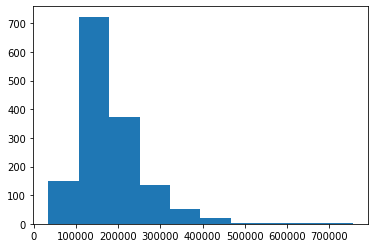

In [43]:
# plot hist
plt.hist(train['SalePrice'])

In [44]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [51]:
cols = np.abs(corr['SalePrice']).sort_values(ascending=False)
cols=cols.reset_index()
cols

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [68]:
cols=cols[:20]
cols

0        SalePrice
1      OverallQual
2        GrLivArea
3       GarageCars
4       GarageArea
5      TotalBsmtSF
6         1stFlrSF
7         FullBath
8     TotRmsAbvGrd
9        YearBuilt
10    YearRemodAdd
11     GarageYrBlt
12      MasVnrArea
13      Fireplaces
14      BsmtFinSF1
15     LotFrontage
16      WoodDeckSF
17        2ndFlrSF
18     OpenPorchSF
Name: index, dtype: object

In [70]:
X.fillna(X.mean(),inplace=True)

In [71]:
X.isnull().any()

OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
BsmtFinSF1      False
LotFrontage     False
WoodDeckSF      False
2ndFlrSF        False
OpenPorchSF     False
dtype: bool

In [69]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61
1,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0
2,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42
3,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35
4,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,1999.0,0.0,1,0,62.0,0,694,40
1456,6,2073,2,500,1542,2073,2,7,1978,1988,1978.0,119.0,2,790,85.0,349,0,0
1457,7,2340,1,252,1152,1188,2,9,1941,2006,1941.0,0.0,2,275,66.0,0,1152,60
1458,5,1078,1,240,1078,1078,1,5,1950,1996,1950.0,0.0,0,49,68.0,366,0,0


In [72]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [73]:
# How good is the model
model.score(X,Y)


0.7920119472546998

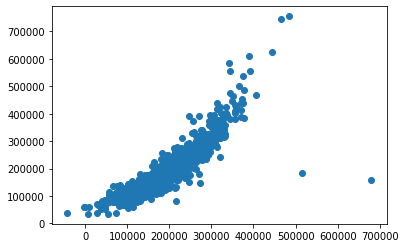

In [75]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [76]:
# move on to test

In [77]:
test = pd.read_csv("test.csv")

In [78]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [79]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [80]:
test=test[[column for column in X.columns if column in test.columns]]

In [81]:
test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,3,944,2,528,0,944,1,4,1952,1952,1956.0,0.0,0,0,74.0,0,0,0
1,5,691,1,216,691,691,1,4,1920,1950,1920.0,0.0,0,0,60.0,0,0,20
2,8,1574,3,824,1574,1574,2,7,2006,2006,2006.0,53.0,1,24,75.0,144,0,104
3,5,1680,2,528,1680,1680,2,8,1976,1976,1976.0,164.0,0,0,NaN,0,0,0
4,7,1504,2,457,1346,1504,2,7,2005,2006,2005.0,16.0,1,16,43.0,156,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,6,1647,2,460,953,953,2,7,1999,2000,1999.0,0.0,1,0,62.0,0,694,40
456,6,2073,2,500,1542,2073,2,7,1978,1988,1978.0,119.0,2,790,85.0,349,0,0
457,7,2340,1,252,1152,1188,2,9,1941,2006,1941.0,0.0,2,275,66.0,0,1152,60
458,5,1078,1,240,1078,1078,1,5,1950,1996,1950.0,0.0,0,49,68.0,366,0,0


In [83]:
test.fillna(test.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [85]:
sp_y =model.predict(test)

sp_y=pd.DataFrame(sp_y)

sp_y.index=np.arange(0,460)
sp_y.reset_index(inplace=True)

In [86]:
sp_y=np.round(sp_y,2)
sp_y

,index,0
0,0,53135.97
1,1,66555.21
2,2,254131.94
3,3,165521.05
4,4,212028.14
...,...,...
455,455,182366.87
456,456,243792.02
457,457,227410.52
458,458,124907.32


In [87]:
sp_y.columns=["Id","SalePrice"]

In [88]:
sp_y.to_csv("testDataPrediction.csv")